In [41]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = yf.download (["^GSPC", "^TNX"], start = "2000-01-01", end = "2021-9-30", progrss = False)
df = df.loc [:, ["Adj Close"]]
df.columns = df.columns.droplevel (0)
df = df.rename (columns = { "^GSPC" : "sp500", "^TNX" : "ten_yield"})

[*********************100%***********************]  2 of 2 completed


In [43]:
df ["sp500_rtn"] = np.log(df.sp500 / df.sp500.shift(1))
df ["ten_yield_rtn"] = np.log(df.ten_yield / df.ten_yield.shift(1))
df.dropna(how = "any", axis = 0, inplace = True)
df.head()

,sp500,ten_yield,sp500_rtn,ten_yield_rtn
Date,,,,
2000-01-03,1455.219971,6.548,-0.009595,0.017408
2000-01-04,1399.420044,6.485,-0.039099,-0.009668
2000-01-05,1402.109985,6.599,0.001920,0.017426
2000-01-06,1403.449951,6.549,0.000955,-0.007606
2000-01-07,1441.469971,6.504,0.026730,-0.006895


In [44]:
corr  = df [["sp500_rtn", "ten_yield_rtn"]].corr ()
print (corr)

               sp500_rtn  ten_yield_rtn
sp500_rtn       1.000000       0.350785
ten_yield_rtn   0.350785       1.000000


[Text(0.5, 1.0, 'S&P 500 vs. 10Y Yield ($\\rho$ =  0.35)'),
 Text(0, 0.5, '10Y Yield log returns'),
 Text(0.5, 0, 'S&P 500 log returns')]

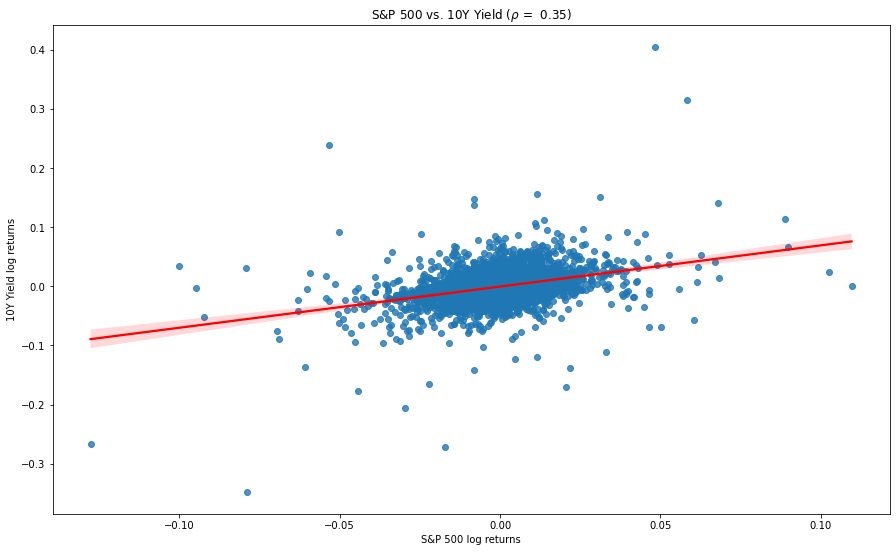

In [45]:
plt.figure(figsize=(15, 9))
corr_coeff = df.sp500_rtn.corr (df.ten_yield_rtn)
ax = sns.regplot (x = "sp500_rtn", y = "ten_yield_rtn", data = df, line_kws = {"color": "red"})
ax.set (title = f"S&P 500 vs. 10Y Yield ($\\rho$ = {corr_coeff: .2f})", ylabel = "10Y Yield log returns", xlabel = "S&P 500 log returns")